In [14]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from helper_functions.OULAD_Helper import plotPerColumnDistribution
import seaborn as sns
import matplotlib.pyplot as plt # plotting
import numpy as np
import datetime
pd.set_option("display.max_rows", None, "display.max_columns", 80, 'display.width', 1000)

In [3]:
dir_ = 'Export2016/export/' #Tên folder
directory = os.listdir(dir_)
print(directory)

['mdl_badge_issued.csv', 'mdl_course_modules.csv', 'mdl_course_modules_completion.csv', 'mdl_grade_grades_history.csv', 'mdl_logstore_standard_log.csv', 'mdl_user.csv']


In [5]:
mdl_user = pd.read_csv('Export2016/export/mdl_user.csv')
mdl_user.dataframeName = 'mdl_user.csv'

mdl_badge_issued = pd.read_csv('Export2016/export/mdl_badge_issued.csv' )
mdl_badge_issued.dataframeName = 'mdl_badge_issued.csv'

mdl_course_modules = pd.read_csv('Export2016/export/mdl_course_modules.csv')
mdl_course_modules.dataframeName = 'mdl_course_modules.csv'

mdl_course_modules_completion = pd.read_csv('Export2016/export/mdl_course_modules_completion.csv')
mdl_course_modules_completion.dataframeName = 'mdl_course_modules_completion.csv'

mdl_grade_grades_history = pd.read_csv('Export2016/export/mdl_grade_grades_history.csv')
mdl_grade_grades_history.dataframeName = 'mdl_grade_grades_history.csv'

mdl_logstore_standard_log = pd.read_csv('Export2016/export/mdl_logstore_standard_log.csv')
mdl_logstore_standard_log.dataframeName = 'mdl_logstore_standard_log.csv'


c:\hello\ai\ai_evr\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (19,20) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [10]:
mdl_user.columns

Index(['id', 'confirmed', 'deleted', 'suspended', 'mnethostid', 'username',
       'idnumber', 'firstname', 'lastname', 'email', 'emailstop', 'icq',
       'skype', 'yahoo', 'aim', 'msn', 'phone1', 'phone2', 'institution',
       'department', 'address', 'city', 'country', 'lang', 'theme', 'timezone',
       'firstaccess', 'lastaccess', 'lastlogin', 'currentlogin', 'lastip',
       'picture', 'url', 'description', 'descriptionformat', 'mailformat',
       'maildigest', 'maildisplay', 'autosubscribe', 'trackforums',
       'timecreated', 'timemodified', 'trustbitmask', 'lastnamephonetic',
       'firstnamephonetic', 'middlename', 'alternatename', 'calendartype'],
      dtype='object')

In [61]:
mdl_user_full = mdl_user[[column for column in mdl_user if (mdl_user[column].isna().sum() / len(mdl_user[column])) < 0.1]]

In [102]:
mdl_user_full.head()

,id,confirmed,deleted,suspended,mnethostid,username,firstname,lastname,email,emailstop,country,lang,timezone,firstaccess,lastaccess,lastlogin,currentlogin,lastip,picture,descriptionformat,mailformat,maildigest,maildisplay,autosubscribe,trackforums,timecreated,timemodified,trustbitmask,calendartype
0,0,1,0,0,1,user186977097674129409,WjLE Pjb a VUQhOz yem tGdQmvn,r nrmZZflGFBbefW REfdbNtc,lhIh LplRfJO kFOnSFr vgzdkgCX,0,AU,en_us,99,1458664032,1471033233,1470073339,1471019691,RQZq ov,0,1,1,0,0,1,1,1458663475,1487132351,0,gregorian
1,0,1,0,0,1,user4786049973974204417,gDOm SYE kqhByCiKt UKeBhg dhsS,rYPW nh uwBnv mRBNDSqXARSS,NVLCcu ynMuo F JTxPtWS EvgZUlDa,0,AU,es,America/Lima,1463176306,1473813005,1473813003,1473813005,JsHYuI,0,1,1,0,2,1,1,1463176270,1487132229,0,gregorian
2,0,1,0,0,1,user7133053338412646401,drbW XEKAWJ Uuf xI SHCBFLbQB H,bk HPF g bJfbmkXA ELjDgTfXK,xsRHIwCM JQpY d fDPEwoCpuHN EQ,0,AU,en,Atlantic/South_Georgia,1463259197,1472945616,1470661999,1470670269,aqGBUvI,0,1,1,0,0,1,1,1463259148,1487132092,0,gregorian
3,0,1,0,0,1,user3543713697010548737,j jFL wXXlycRoDTOOFkDATM Wn xY,ntXGuKKFnZM DDzIKJ SGcDDAQ,TeE GqMSCATQZ y DSadhGXurEnmVqH,0,AU,en_us,Africa/Johannesburg,1452420577,1471330230,1470725017,1471329416,PI dOVP,0,1,1,0,0,1,1,1452399813,1487132086,0,gregorian
4,0,1,0,0,1,user1626801571545219073,ELnLGLosOo ZpbuQ p Rltre o EX,BWH tPHVEGvLM FR WAOcwKuJfC,CbR iOB d P ZIvAsUcVGJcHVpWwba,0,AU,en_us,99,1464781005,1470766418,1464781005,1470765779,zdrhoZy,0,1,1,0,0,1,1,1464780978,1487132339,0,gregorian


In [114]:
mdl_user_full1['calendartype'].unique()

array(['gregorian'], dtype=object)

In [128]:
mdl_user_full1 = mdl_user_full[[column for column in mdl_user_full if (mdl_user_full[column].value_counts().sort_values(ascending=False).reset_index(drop=True)[0] / len(mdl_user_full[column])) < 0.5]]

In [129]:
mdl_user_full1.head()

,username,firstname,lastname,email,timezone,firstaccess,lastaccess,lastlogin,currentlogin,lastip,timecreated,timemodified
0,user186977097674129409,WjLE Pjb a VUQhOz yem tGdQmvn,r nrmZZflGFBbefW REfdbNtc,lhIh LplRfJO kFOnSFr vgzdkgCX,99,1458664032,1471033233,1470073339,1471019691,RQZq ov,1458663475,1487132351
1,user4786049973974204417,gDOm SYE kqhByCiKt UKeBhg dhsS,rYPW nh uwBnv mRBNDSqXARSS,NVLCcu ynMuo F JTxPtWS EvgZUlDa,America/Lima,1463176306,1473813005,1473813003,1473813005,JsHYuI,1463176270,1487132229
2,user7133053338412646401,drbW XEKAWJ Uuf xI SHCBFLbQB H,bk HPF g bJfbmkXA ELjDgTfXK,xsRHIwCM JQpY d fDPEwoCpuHN EQ,Atlantic/South_Georgia,1463259197,1472945616,1470661999,1470670269,aqGBUvI,1463259148,1487132092
3,user3543713697010548737,j jFL wXXlycRoDTOOFkDATM Wn xY,ntXGuKKFnZM DDzIKJ SGcDDAQ,TeE GqMSCATQZ y DSadhGXurEnmVqH,Africa/Johannesburg,1452420577,1471330230,1470725017,1471329416,PI dOVP,1452399813,1487132086
4,user1626801571545219073,ELnLGLosOo ZpbuQ p Rltre o EX,BWH tPHVEGvLM FR WAOcwKuJfC,CbR iOB d P ZIvAsUcVGJcHVpWwba,99,1464781005,1470766418,1464781005,1470765779,zdrhoZy,1464780978,1487132339


<AxesSubplot:>

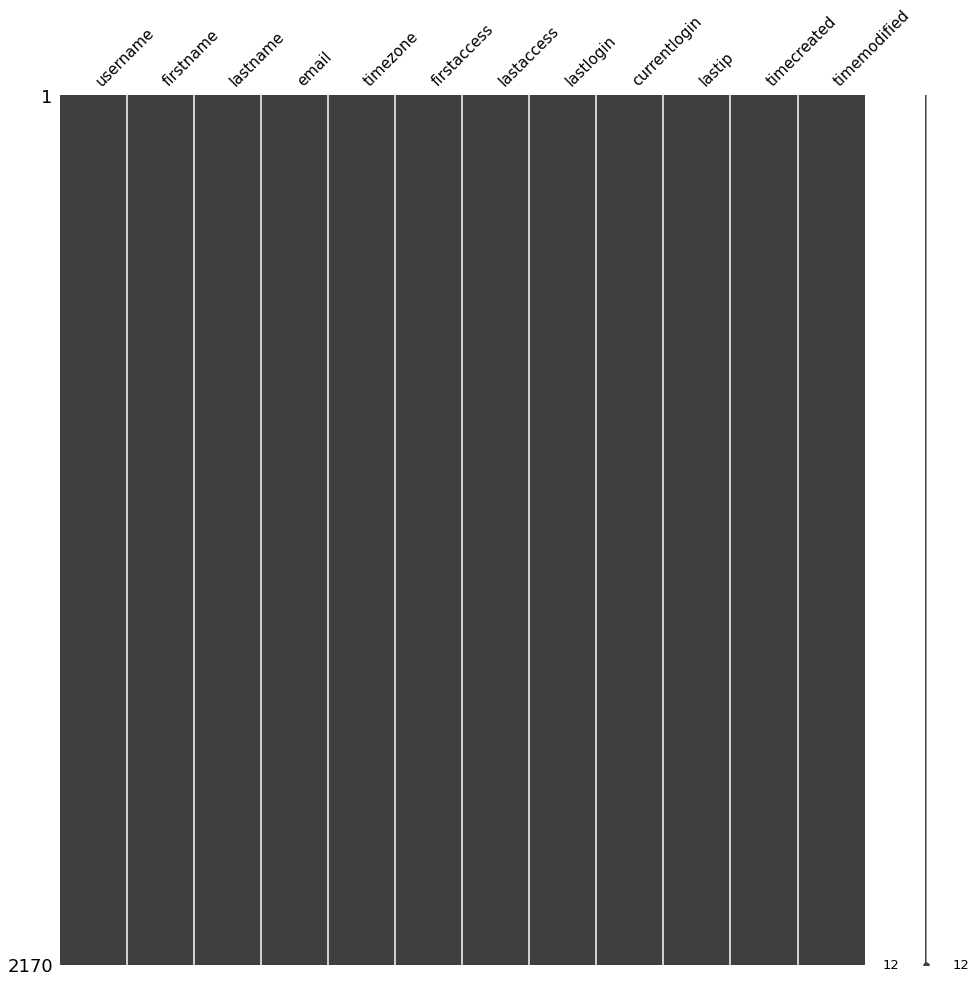

In [118]:
# Missing value plot 
import missingno as msno
msno.matrix(mdl_user_full1, figsize=(16,16), fontsize=15)

In [161]:
mdl_badge_issued.head()

,username,uniquehash,dateissued,visible
0,user6442803380426375169,dff34e86c5ac6c8ec7650673998a2c5f66a33e53,1470554624,1
1,user6442803380426375169,dff34e86c5ac6c8ec7650673998a2c5f66a33e53,1470554624,1
2,user8540069828419911681,a4f714807acfdb2c8a6367f095ee9179b590e333,1470554624,1
3,user8540069828419911681,a4f714807acfdb2c8a6367f095ee9179b590e333,1470554624,1
4,user2882394166283730945,c9a55d27a003befb7f7da54d2f919435b05504d1,1470554624,1


In [122]:
mdl_course_modules.head()

,username,uniquehash,dateissued,visible
0,user6442803380426375169,dff34e86c5ac6c8ec7650673998a2c5f66a33e53,1470554624,1
1,user6442803380426375169,dff34e86c5ac6c8ec7650673998a2c5f66a33e53,1470554624,1
2,user8540069828419911681,a4f714807acfdb2c8a6367f095ee9179b590e333,1470554624,1
3,user8540069828419911681,a4f714807acfdb2c8a6367f095ee9179b590e333,1470554624,1
4,user2882394166283730945,c9a55d27a003befb7f7da54d2f919435b05504d1,1470554624,1


In [123]:
mdl_course_modules.head()

,name,id,course,module,instance,section,idnumber,added,score,indent,visible,visibleold,groupmode,groupingid,completion,completiongradeitemnumber,completionview,completionexpected,showdescription,availability,deletioninprogress
0,forum,54984,10464,9,13387,58964,NaN,1372670270,0,0,1,1,0,0,1,NaN,0,0,0,NaN,0
1,survey,55004,10464,19,662,58966,NaN,1378189004,0,0,1,1,0,0,1,NaN,0,0,0,NaN,0
2,feedback,54995,10464,7,1007,58965,NaN,1372678410,0,0,1,1,0,0,2,NaN,0,0,0,NaN,0
3,forum,54999,10464,9,13389,58965,NaN,1372677682,0,0,1,1,1,0,0,NaN,0,0,0,NaN,0
4,quiz,54994,10464,16,4407,58965,NaN,1372678281,0,0,1,1,0,0,2,0.0,0,0,0,NaN,0


In [132]:
mdl_course_modules.describe()

,id,course,module,instance,section,idnumber,added,score,indent,visible,visibleold,groupmode,groupingid,completion,completiongradeitemnumber,completionview,completionexpected,showdescription,deletioninprogress
count,60.000000,60.0,60.000000,60.000000,60.000000,0.0,6.000000e+01,60.0,60.0,60.0,60.0,60.000000,60.0,60.000000,4.0,60.000000,60.0,60.0,60.0
mean,55307.300000,10464.0,11.433333,4622.700000,58966.383333,NaN,1.415109e+09,0.0,0.0,1.0,1.0,0.100000,0.0,0.833333,0.0,0.083333,0.0,0.0,0.0
std,1404.160625,0.0,5.009708,3849.467479,1.415312,NaN,3.967707e+07,0.0,0.0,0.0,0.0,0.302532,0.0,0.847062,0.0,0.278718,0.0,0.0,0.0
min,54984.000000,10464.0,1.000000,303.000000,58964.000000,NaN,1.372670e+09,0.0,0.0,1.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
25%,54999.750000,10464.0,8.000000,1503.500000,58965.000000,NaN,1.372744e+09,0.0,0.0,1.0,1.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0
50%,55015.500000,10464.0,12.000000,4219.500000,58966.000000,NaN,1.428581e+09,0.0,0.0,1.0,1.0,0.000000,0.0,1.000000,0.0,0.000000,0.0,0.0,0.0
75%,55034.500000,10464.0,15.000000,4938.500000,58968.000000,NaN,1.449571e+09,0.0,0.0,1.0,1.0,0.000000,0.0,2.000000,0.0,0.000000,0.0,0.0,0.0
max,63335.000000,10464.0,22.000000,13394.000000,58969.000000,NaN,1.472649e+09,0.0,0.0,1.0,1.0,1.000000,0.0,2.000000,0.0,1.000000,0.0,0.0,0.0


In [124]:
mdl_course_modules_full = mdl_course_modules[[column for column in mdl_course_modules if (mdl_course_modules[column].isna().sum() / len(mdl_course_modules[column])) < 0.1]]

In [130]:
mdl_course_modules_full1 = mdl_course_modules_full[[column for column in mdl_course_modules_full if (mdl_course_modules_full[column].value_counts().sort_values(ascending=False).reset_index(drop=True)[0] / len(mdl_course_modules_full[column])) < 0.5]]

In [131]:
mdl_course_modules_full1.head()

,name,id,module,instance,section,added,completion
0,forum,54984,9,13387,58964,1372670270,1
1,survey,55004,19,662,58966,1378189004,1
2,feedback,54995,7,1007,58965,1372678410,2
3,forum,54999,9,13389,58965,1372677682,0
4,quiz,54994,16,4407,58965,1372678281,2


In [133]:
mdl_course_modules_completion.describe()

,id,coursemoduleid,completionstate,viewed,timemodified
count,30986.000000,30986.000000,30986.000000,30986.000000,3.098600e+04
mean,252426.606887,55006.174950,0.997741,0.175595,1.471769e+09
std,12424.885001,18.642546,0.047477,0.380482,9.707757e+05
min,228732.000000,54984.000000,0.000000,0.000000,1.457702e+09
25%,241943.250000,54990.000000,1.000000,0.000000,1.471093e+09
50%,252589.500000,55002.000000,1.000000,0.000000,1.471876e+09
75%,263268.750000,55017.000000,1.000000,0.000000,1.472520e+09
max,273649.000000,55052.000000,1.000000,1.000000,1.481555e+09


In [134]:
mdl_course_modules_completion.head()

,username,id,coursemoduleid,completionstate,viewed,timemodified
0,user4634818596319526913,228878,54984,1,0,1459172041
1,user6686419676416704513,229164,54984,1,0,1462433985
2,user8928278637971505153,228735,54984,1,0,1457780348
3,user6300470324605485057,229088,54984,0,0,1461233478
4,user585221575054196737,229217,54984,1,0,1463342457


In [135]:
mdl_grade_grades_history.describe()

,id,action,oldid,timemodified,itemid,rawgrade,rawgrademax,rawgrademin,rawscaleid,usermodified,finalgrade,hidden,locked,locktime,exported,overridden,excluded,feedbackformat,information,informationformat
count,70037.000000,70037.000000,70037.000000,7.003700e+04,70037.000000,8720.000000,70037.000000,70037.000000,943.000000,8755.000000,22054.000000,70037.000000,70037.0,70037.0,70037.0,70037.0,70037.0,70037.000000,0.0,70037.0
mean,266993.051644,1.730028,118024.594614,1.471826e+09,20583.608321,14.256969,29.881320,0.371075,169.492047,27435.322901,15.709162,0.358082,0.0,0.0,0.0,0.0,0.0,0.024558,NaN,0.0
std,26534.955474,0.444398,6508.623826,5.358018e+05,60.917202,20.867863,40.414159,0.483096,1.070592,18509.284271,28.203211,0.479440,0.0,0.0,0.0,0.0,0.0,0.154776,NaN,0.0
min,221372.000000,1.000000,107173.000000,1.468488e+09,20559.000000,0.000000,0.000000,0.000000,168.000000,3.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0
25%,243764.000000,1.000000,112561.000000,1.471825e+09,20561.000000,5.666670,1.000000,0.000000,168.000000,6.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0
50%,266955.000000,2.000000,117859.000000,1.471959e+09,20566.000000,8.666670,10.000000,0.000000,170.000000,39440.000000,5.600000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0
75%,289085.000000,2.000000,122955.000000,1.471961e+09,20571.000000,10.000000,80.000000,1.000000,170.000000,41534.000000,10.000000,1.000000,0.0,0.0,0.0,0.0,0.0,0.000000,NaN,0.0
max,314562.000000,3.000000,133820.000000,1.474019e+09,20787.000000,100.000000,135.000000,1.000000,171.000000,43624.000000,134.000000,1.000000,0.0,0.0,0.0,0.0,0.0,1.000000,NaN,0.0


In [137]:
mdl_grade_grades_history_full = mdl_grade_grades_history[[column for column in mdl_grade_grades_history if (mdl_grade_grades_history[column].isna().sum() / len(mdl_grade_grades_history[column])) < 0.1]]

In [ ]:
mdl_grade_grades_history_full.head()

In [147]:
mdl_grade_grades_history_full1 = mdl_grade_grades_history_full[[column for column in mdl_grade_grades_history_full if (mdl_grade_grades_history_full[column].value_counts().sort_values(ascending=False).reset_index(drop=True)[0] / len(mdl_grade_grades_history_full[column])) < 0.5]]

In [148]:
mdl_grade_grades_history_full1.head()

,username,id,oldid,timemodified,itemid,rawgrademax
0,user2093464160691027969,284754,112464,1471960348,20787,100.0
1,user1314540488300167169,299232,122119,1472077698,20564,5.0
2,user2516430680280268801,299224,109716,1472077159,20564,5.0
3,user1665969594520567809,299663,112787,1472121360,20564,5.0
4,user7504105600452657153,299682,127999,1472122080,20564,5.0


In [136]:
mdl_logstore_standard_log.describe() 

,id,objectid,edulevel,contextid,contextlevel,contextinstanceid,courseid,anonymous,timecreated
count,2.391762e+06,1.305433e+06,2.391762e+06,2.391762e+06,2.391762e+06,2.391762e+06,2.391762e+06,2.391762e+06,2.391762e+06
mean,1.126375e+07,4.729452e+05,8.821522e-01,1.164300e+05,4.005589e+01,2.041733e+04,5.173489e+03,2.571744e-03,1.458813e+09
std,4.727198e+06,1.204367e+06,9.610081e-01,9.939486e+04,2.578564e+01,2.284535e+04,4.877766e+03,5.064713e-02,1.768348e+07
min,1.766500e+04,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.417707e+09
25%,7.702446e+06,4.409000e+03,0.000000e+00,1.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,1.451987e+09
50%,1.412332e+07,3.310200e+04,0.000000e+00,1.453390e+05,5.000000e+01,1.043100e+04,6.744000e+03,0.000000e+00,1.470650e+09
75%,1.509242e+07,7.095400e+04,2.000000e+00,2.127420e+05,7.000000e+01,4.324500e+04,1.046400e+04,0.000000e+00,1.471980e+09
max,1.683094e+07,4.001117e+06,2.000000e+00,2.594250e+05,8.000000e+01,1.248950e+05,1.207000e+04,1.000000e+00,1.484027e+09


In [152]:
mdl_logstore_standard_log.head()

,username,id,eventname,component,action,target,objecttable,objectid,crud,edulevel,contextid,contextlevel,contextinstanceid,courseid,anonymous,other,timecreated,origin,ip,relatedusername,realusername
0,user8540069828419911681,25017,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,107483,50,5282,5282,0,N;,1417771086,web,0.0.0.0,NaN,NaN
1,user8540069828419911681,25017,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,107483,50,5282,5282,0,N;,1417771086,web,0.0.0.0,NaN,NaN
2,user6442803380426375169,37433,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,107483,50,5282,5282,0,N;,1417859881,web,0.0.0.0,NaN,NaN
3,user6442803380426375169,37433,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,107483,50,5282,5282,0,N;,1417859881,web,0.0.0.0,NaN,NaN
4,user8540069828419911681,70090,\core\event\course_viewed,core,viewed,course,NaN,NaN,r,2,107483,50,5282,5282,0,N;,1418071759,web,0.0.0.0,NaN,NaN


In [150]:
mdl_logstore_standard_log_full = mdl_logstore_standard_log[[column for column in mdl_logstore_standard_log if (mdl_logstore_standard_log[column].isna().sum() / len(mdl_logstore_standard_log[column])) < 0.1]]

In [151]:
mdl_logstore_standard_log_full.head()

,username,id,eventname,component,action,target,crud,edulevel,contextid,contextlevel,contextinstanceid,courseid,anonymous,other,timecreated,origin,ip
0,user8540069828419911681,25017,\core\event\course_viewed,core,viewed,course,r,2,107483,50,5282,5282,0,N;,1417771086,web,0.0.0.0
1,user8540069828419911681,25017,\core\event\course_viewed,core,viewed,course,r,2,107483,50,5282,5282,0,N;,1417771086,web,0.0.0.0
2,user6442803380426375169,37433,\core\event\course_viewed,core,viewed,course,r,2,107483,50,5282,5282,0,N;,1417859881,web,0.0.0.0
3,user6442803380426375169,37433,\core\event\course_viewed,core,viewed,course,r,2,107483,50,5282,5282,0,N;,1417859881,web,0.0.0.0
4,user8540069828419911681,70090,\core\event\course_viewed,core,viewed,course,r,2,107483,50,5282,5282,0,N;,1418071759,web,0.0.0.0


In [155]:
mdl_logstore_standard_log_full1 = mdl_logstore_standard_log_full[[column for column in mdl_logstore_standard_log_full if (mdl_logstore_standard_log_full[column].value_counts().sort_values(ascending=False).reset_index(drop=True)[0] / len(mdl_logstore_standard_log_full[column])) < 0.5]]

In [157]:
mdl_logstore_standard_log_full1.head()

,username,id,eventname,action,target,contextid,contextlevel,contextinstanceid,courseid,other,timecreated
0,user8540069828419911681,25017,\core\event\course_viewed,viewed,course,107483,50,5282,5282,N;,1417771086
1,user8540069828419911681,25017,\core\event\course_viewed,viewed,course,107483,50,5282,5282,N;,1417771086
2,user6442803380426375169,37433,\core\event\course_viewed,viewed,course,107483,50,5282,5282,N;,1417859881
3,user6442803380426375169,37433,\core\event\course_viewed,viewed,course,107483,50,5282,5282,N;,1417859881
4,user8540069828419911681,70090,\core\event\course_viewed,viewed,course,107483,50,5282,5282,N;,1418071759


In [160]:
    mdl_logstore_standard_log_full1.target.value_counts()

message                                 697550
course_module                           273361
course                                  263973
webservice_function                     257108
discussion                              157306
user                                    102016
chapter                                  99319
user_enrolment                           62550
role                                     62090
course_module_completion                 56268
cohort_member                            43116
attempt                                  35592
user_profile                             27685
assessable                               24821
post                                     18099
submission                               17383
user_list                                16841
discussion_subscription                  14089
group_member                             13158
page                                     10054
competency_evidence                       9094
grade        